# MongoDB

### Fast, secure, and highly available MongoDB service for any scale. Built and run by the team behind the database.

# Table of Contets

### 1. Indexing

- [Indexing](#Indexing)
- [background Indexing](#bg_Indexing)
- [view existing indexes](#view_index)
- [remove existing indexes](#remove_index)

### 2. Database Lock

- [Lock types](#lock)

### 3. Performance test

- [test sample](#test_sample)
- [Indexing](#index)
- [SSD vs. HDD](#ssd_hdd)

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
import matplotlib.pyplot as plt
import numpy as np

---

<a id="indexing"></a>
# Indexing

## Index Types

### 1. Single Field

In addition to the MongoDB-defined _id index, MongoDB supports the creation of user-defined ascending/descending indexes on a single field of a document.

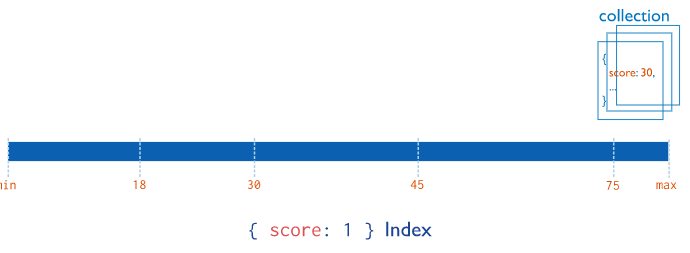

### 2. Compound Index

MongoDB also supports user-defined indexes on multiple fields, i.e. compound indexes.

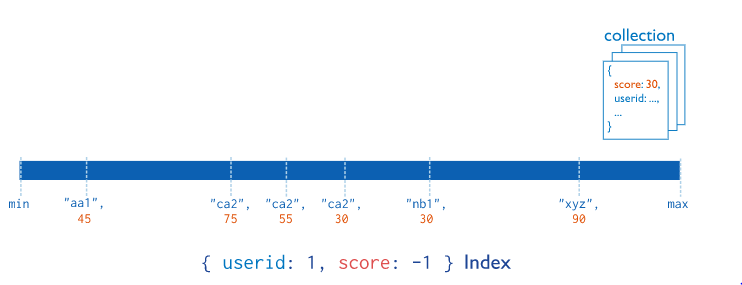

<br><br><br>

---

## Create an Index

### 1. Single Field

db.collection.createIndex({'TKOUT_TIME':-1})

### 2. Compound Index

db.collection.createIndex({'PROCESS_ID':1, 'TKOUT_TIME':-1})

<br><br><br>

---

<a id="bg_Indexing"></a>
## background Indexing

### foreground vs. background

**By default, MongoDB builds indexes in the foreground**, which prevents all read and write operations to the database while the index builds. Also, no operation that requires a read or write lock on all databases (e.g. listDatabases) can occur during a foreground index build.

**Background index** construction allows read and write operations to continue while building the index.

### consideration

**background index builds take longer** to complete and result in an index that is initially larger, or less compact, than an index built in the foreground. Over time, the compactness of indexes built in the background will approach foreground-built indexes.

### make background Index

db.collection.createInex({'PROCESS_ID':1}, {background: true})

<br><br><br>

<a id="view_index"></a>
### View Existing Indexes

db.collection.getIndexes()

<br><br><br>

<a id="remove_index"></a>
### Remove Existing Indexes

**Example**

[
    {
      "key" : { "cat" : -1 },
      "ns" : "test.pets",
      "name" : "catIdx"
   },
   {
      "v" : 1,
      "key" : { "cat" : 1, "dog" : -1 },
      "ns" : "test.pets",
      "name" : "cat_1_dog_-1"
   }
]

**drop Index using its name property**

db.collection.dropIndex("catIdx")

<br><br><br>

---

<a id="lock"></a>
## Database Lock

### Lock types

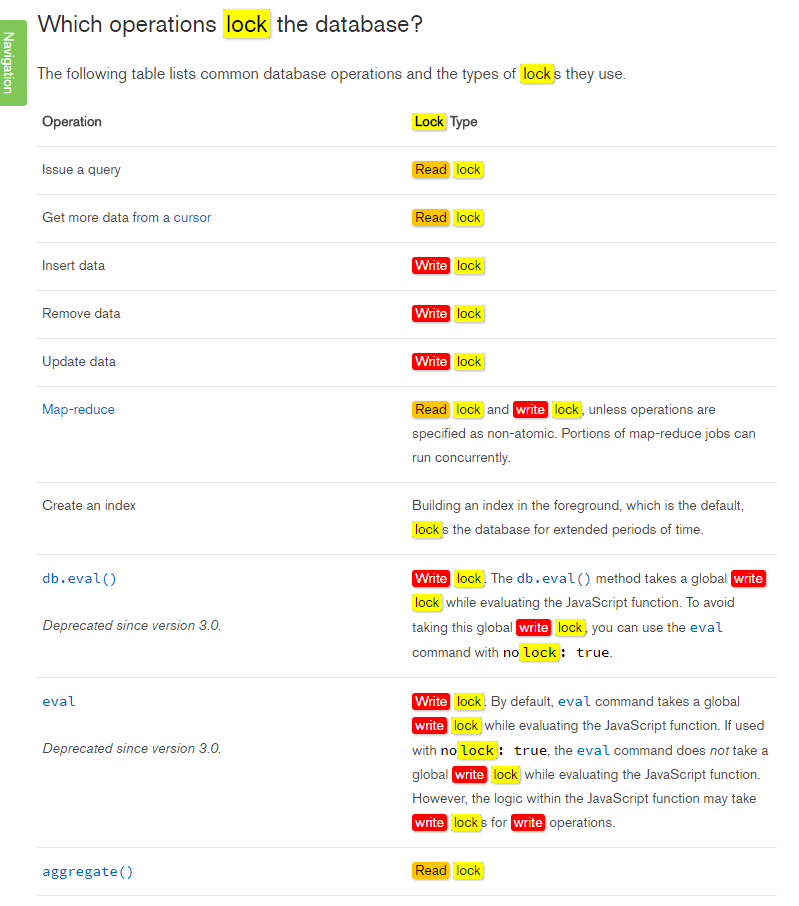

<br><br><br>

---

# Performance test

<a id="test_sample"></a>
## Test Sample

1. sample size : 3153,6000
2. fields count : 43ea
    - id      : 1ea
    - time    : 1ea
    - integer : 1ea
    - float   : 40ea
3. Storage : SSD

<br>

---

### 1. Indexing performance

#### Single Index @Time field

In [4]:
query_1month = {
    '$and':[
        {'Time':{'$gte':'2017-09-01 00:00:00'}},
        {'Time':{'$lte':'2017-09-30 00:00:00'}},
    ]
}

#### results:
query_size : 250,5601


**SSD**
query_size : 250,5601

- Indexed [Unit: sec]
    1. indexing : 0.87
    2. IO       : 47.26
- none-index [Unit: sec]
    1. indexing : 41.99
    2. IO       : 86.76<br><br>

**HDD**
- Indexed [Unit: sec]
    1. indexing : 0.86
    2. IO       : 48.41

**Indexed showed 63% better vs. none-indexed**

In [5]:
query_2month = {
    '$and':[
        {'Time':{'$gte':'2017-08-01 00:00:00'}},
        {'Time':{'$lte':'2017-09-30 00:00:00'}},
    ]
}

#### results:
query_size : 518,4001

**SSD**
- Indexed [Unit: sec]
    1. indexing : 1.69
    2. IO       : 94.72
- none-index [Unit: sec]
    1. indexing : 40.66
    2. IO       : 129.43
    
**HDD**
- Indexed [Unit: sec]
    1. indexing : 2.13
    2. IO       : 100.36

**Indexed showed 43% better vs. none-indexed**

In [8]:
query_3month = {
    '$and':[
        {'Time':{'$gte':'2017-07-01 00:00:00'}},
        {'Time':{'$lte':'2017-09-30 00:00:00'}},
    ]
}

#### results:
query_size : 786,2401

**SSD**
- Indexed [Unit: sec]
    1. indexing : 2.63
    2. IO       : 146.26
- none-index [Unit: sec]
    1. indexing : 42.90
    2. IO       : 176.40
    
**HDD**
- Indexed [Unit: sec]
    1. indexing : 2.94
    2. IO       : 148.85

**Indexed showed 32% better vs. none-indexed**

In [73]:
sample_size = np.array([2505601,5184001,7862401])

indexed_time = np.array([0.87,1.69,2.63])
nonindexed_time = np.array([41.99,40.66,42.9])

io_indexed_time = np.array([47.26,94.72,146.26])
io_nonindexed_time = np.array([86.76,129.43,176.4])

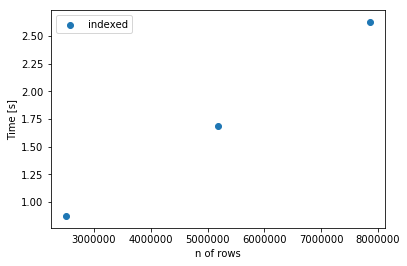

In [75]:
plt.scatter(sample_size, indexed_time, label='indexed')
# plt.scatter(sample_size, nonindexed_time, label='non-indexed')

# plt.plot(users, time/users, label='normalizing time', color='r')

plt.legend()
plt.xlabel('n of rows')
plt.ylabel('Time [s]')

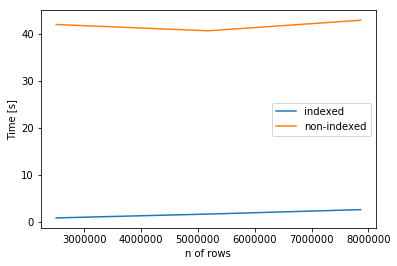

In [81]:
plt.plot(sample_size, indexed_time, label='indexed')
plt.plot(sample_size, nonindexed_time, label='non-indexed')

plt.legend()
plt.xlabel('n of rows')
plt.ylabel('Time [s]')

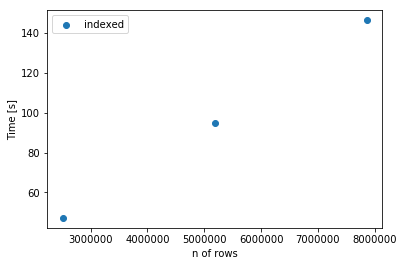

In [78]:
plt.scatter(sample_size, io_indexed_time, label='indexed')
# plt.scatter(sample_size, nonindexed_time, label='non-indexed')

# plt.plot(users, time/users, label='normalizing time', color='r')

plt.legend()
plt.xlabel('n of rows')
plt.ylabel('Time [s]')

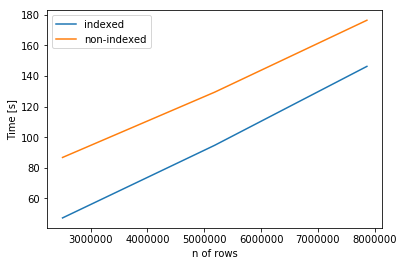

In [80]:
plt.plot(sample_size, io_indexed_time, label='indexed')
plt.plot(sample_size, io_nonindexed_time, label='non-indexed')

# plt.plot(users, time/users, label='normalizing time', color='r')

plt.legend()
plt.xlabel('n of rows')
plt.ylabel('Time [s]')

<a id="ssd_hdd"></a>
## SSD vs. HDD

### conclusion
SSD & HDD showed similar performance

In [84]:
ssd_indexing = np.array([0.87,1.69,2.63])
hdd_indexing = np.array([0.86,2.13,2.94])

ssd_io = np.array([47.26,94.72,146.26])
hdd_io = np.array([48.41,100.36,148.85])

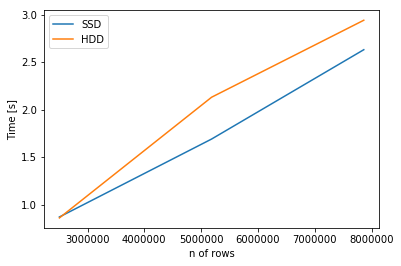

In [85]:
plt.plot(sample_size, ssd_indexing, label='SSD')
plt.plot(sample_size, hdd_indexing, label='HDD')

plt.legend()
plt.xlabel('n of rows')
plt.ylabel('Time [s]')

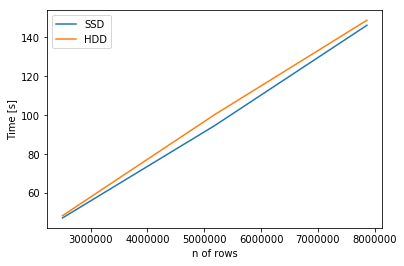

In [86]:
plt.plot(sample_size, ssd_io, label='SSD')
plt.plot(sample_size, hdd_io, label='HDD')

plt.legend()
plt.xlabel('n of rows')
plt.ylabel('Time [s]')

<br>

---

### 2. Performance w.r.t query count

In [ ]:
query_1month = {
    '$and':[
        {'Time':{'$gte':'2017-09-01 00:00:00'}},
        {'Time':{'$lte':'2017-09-30 00:00:00'}},
    ]
}

**1 users:**

**SSD**
    - Index : 0.82
    - query : 47.49
**HDD**
    - Index : 0.94
    - query : 47.65

**2 users:**

**SSD**
    - Index : 0.85
    - query : 52.75
**HDD**
    - Index : 1.23
    - query : 47.36

**3 users:**

**SSD**
    - Index : 0.88
    - query : 50.04
**HDD**
    - Index : 1.16
    - query : 50.83

**5 users:**

**SSD**
    - Index : 1.17
    - query : 60.70
**HDD**
    - Index : 1.18
    - query : 69.29

**10 users:**

**SSD**
    - Index : 1.45
    - query : 101.65
**HDD**
    - Index : 1.59
    - query : 95.63

**25 users:**

**SSD**
    - Index : 2.94
    - query : 223.65
    
**HDD**
    - Index : 3.59
    - query : 216.92

### performance by users

In [66]:
users = np.array([1,2,3,5,10,25])
time = np.array([47.49,52.75,50.04,60.7,101.65,223.65])

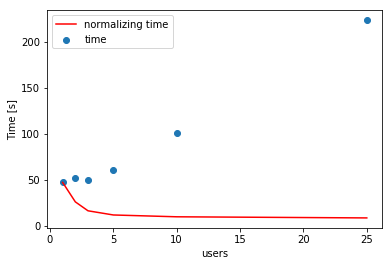

In [69]:
plt.scatter(users, time, label='time')
plt.plot(users, time/users, label='normalizing time', color='r')

plt.legend()
plt.xlabel('users')
plt.ylabel('Time [s]')

### performance w.r.t SSD vs. HDD

In [95]:
users = [1,2,3,5,10,25]

ssd_index = np.array([0.82,0.85,1.16,1.17,1.45,2.94])
hdd_index = np.array([0.94,1.23,1.16,1.18,1.59,3.59])

ssd_io = np.array([47.49,52.75,50.04,60.7,101.65,223.65])
hdd_io = np.array([47.65,47.36,50.83,69.29,95.63,216.92])

### Index time

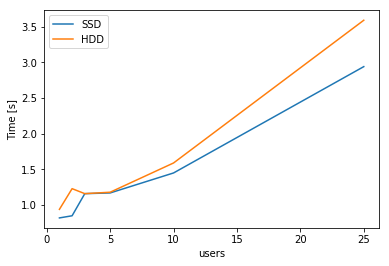

In [97]:
plt.plot(users, ssd_index, label='SSD')
plt.plot(users, hdd_index, label='HDD')

plt.legend()
plt.xlabel('users')
plt.ylabel('Time [s]')

### IO time

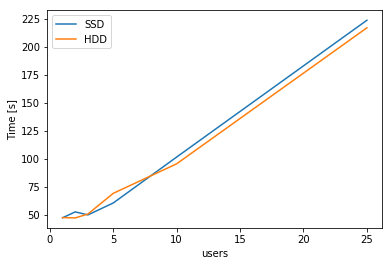

In [98]:
plt.plot(users, ssd_io, label='SSD')
plt.plot(users, hdd_io, label='HDD')

plt.legend()
plt.xlabel('users')
plt.ylabel('Time [s]')

<br>

---

### 2. Compoind Index vs. Single Index

#### Compoind Index vs. Single Index

set Time, No filed as index<br><br>
1) set Time, No as single Index<br>
2) set Time, No as compound Index

In [ ]:
query_3month = {
    '$and':[
        {'Time':{'$gte':'2017-07-01 00:00:00'}},    # 15638401
        {'Time':{'$lte':'2017-09-30 00:00:00'}},    # 23500801
        {'No':{'$gte':15638401}},
        {'No':{'$lte':23500801}},
    ]
}

#### results:
query_size : 786,2401

1. Single Inexed by Time
    - Indexing : 2.57s
    - query : 149.26s
<br><br>
- Single Inexed by No:
    - Indexing : 2.62s
    - query : 145.84s
<br><br>
- Multi-Single-Inexed [Time, No]
    - Indexing : 14.48s
    - query : 152.26s
<br><br>
- Compound Inexed:
    - Indexing : 14.83s
    - query : 159.49s
<br>

**Indexed showed 48.4% better vs. none-indexed**

#### result :
1. Single Index 3ea : Time, No, col_0
    - Indexing Time : 20.02s
2. Compound Index : Time, No, col_0
    - Indexing Time : 20.02s

<br>

---

### 3. Only Query typical columns

#### result :
total documents : 786,2401
<br><br>
1. All 43ea fields : 
    - Indexing Time : 2.65s
    - Query Time : 163.67s
    
- 1ea fields :
    - Indexing Time : 2.71s
    - Query Time : 60.13s
    
- 2ea fields :
    - Indexing Time : 2.64s
    - Query Time : 64.88s
    
- 5ea fields :
    - Indexing Time : 2.77s
    - Query Time : 73.4s
    
- 10ea fields :
    - Indexing Time : 2.70s
    - Query Time : 82.78s
    
- 20ea fields :
    - Indexing Time : 2.74s
    - Query Time : 108.47s
    
- 30ea fields :
    - Indexing Time : 2.74s
    - Query Time : 135.26s
    
- 40ea fields :
    - Indexing Time : 2.67s
    - Query Time : 149.16s

In [70]:
n_field = np.array([1,2,5,10,20,30,40,43])
time= np.array([60.13,64.88,73.4,82.78,108.47,108.47,149.16,163.67])
time_norm = time / n_field

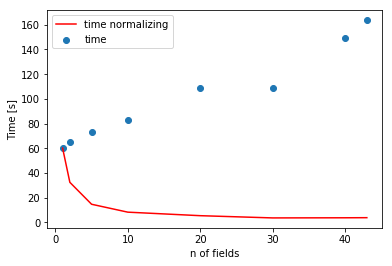

In [71]:
plt.scatter(n_field, time, label='time')
plt.plot(n_field, time/n_field, label='time normalizing', color='r')

plt.legend()
plt.xlabel('n of fields')
plt.ylabel('Time [s]')